In [29]:
# Credit Modeling Notebook

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('credit_risk_dataset.csv')

In [32]:
df.head()
# for loan status 0 is no default 1 is default

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [34]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [35]:
num_default = df[df['loan_status'] == 1]['loan_status'].count()
num_no_default = df[df['loan_status'] == 0]['loan_status'].count()
assert num_default + num_no_default == len(df)

In [36]:
df[df['loan_int_rate'].isna()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4


In [37]:
df.dropna(inplace=True)

In [38]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


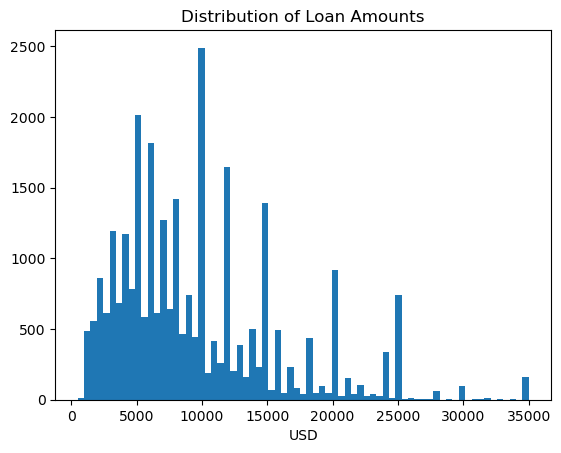

In [39]:
plt.hist(df['loan_amnt'], bins='auto')
plt.title('Distribution of Loan Amounts')
plt.xlabel('USD')
plt.show()

In [40]:
for i in df.columns:
    print(i)

person_age
person_income
person_home_ownership
person_emp_length
loan_intent
loan_grade
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_default_on_file
cb_person_cred_hist_length


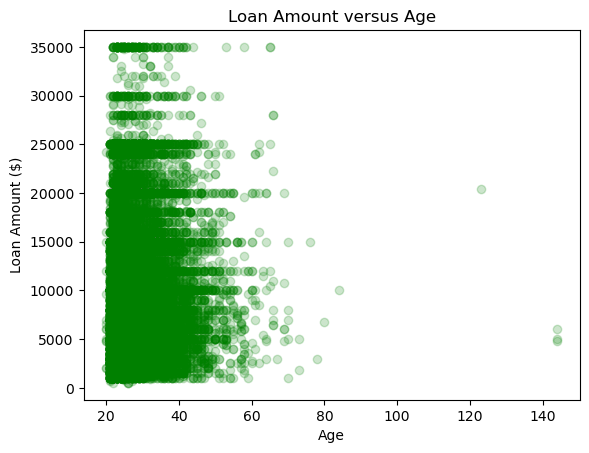

In [41]:
plt.scatter(df['person_age'],df['loan_amnt'], c='green', alpha=0.2)
plt.title('Loan Amount versus Age')
plt.xlabel('Age')
plt.ylabel('Loan Amount ($)')
plt.show()

In [42]:
# we can see that younger people tend do have more loans
# we can also see that there are some age outliers that are incorrect

In [43]:
df = df[df['person_age'] < 100]

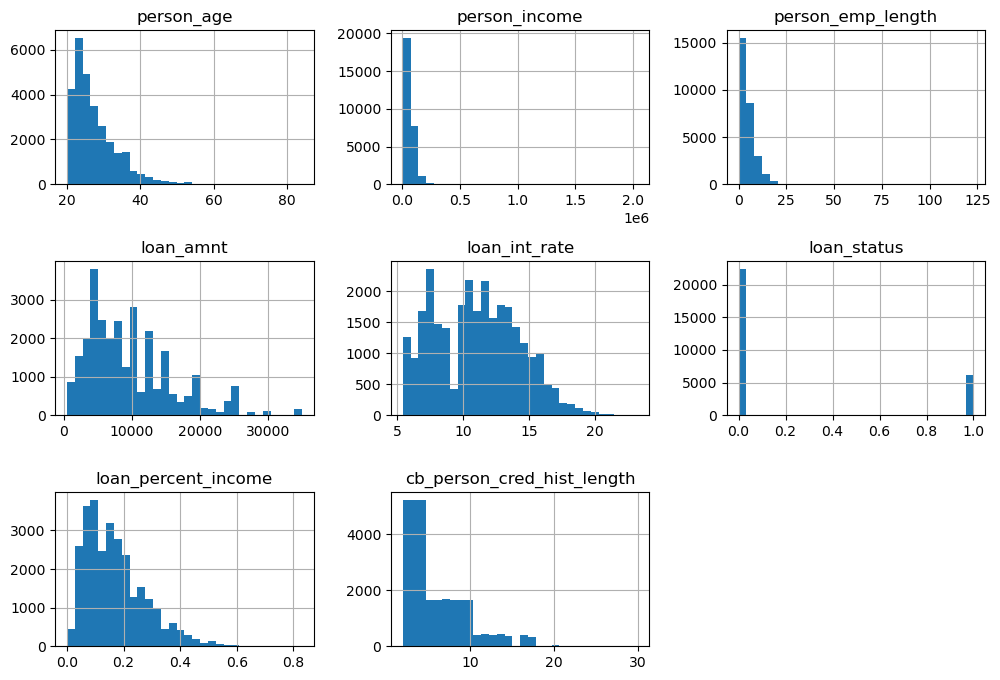

In [44]:
df.hist(bins=30, figsize= (12,8))
plt.subplots_adjust(hspace=0.5)

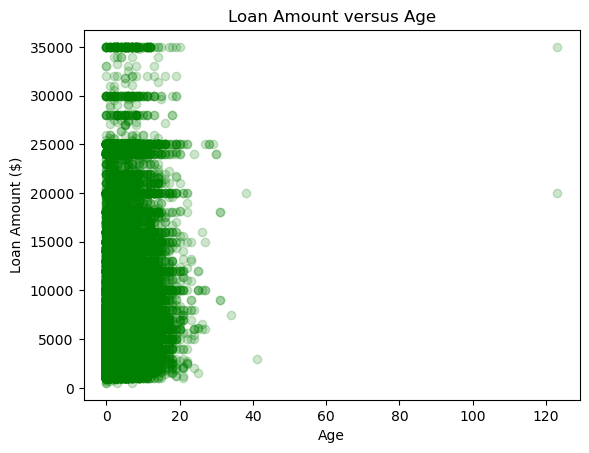

In [45]:
#Looks like we have some outliers in employment length
# two people have been employed for over 125 years??
plt.scatter(df['person_emp_length'],df['loan_amnt'], c='green', alpha=0.2)
plt.title('Loan Amount versus Age')
plt.xlabel('Age')
plt.ylabel('Loan Amount ($)')
plt.show()

In [46]:
df = df[df['person_emp_length'] < 50]

In [47]:
pd.crosstab(df['loan_intent'], df['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3269,1296,4565
EDUCATION,4731,971,5702
HOMEIMPROVEMENT,2377,821,3198
MEDICAL,3872,1421,5293
PERSONAL,3913,962,4875
VENTURE,4268,731,4999
All,22430,6202,28632


In [48]:
pd.crosstab(df['person_home_ownership'], df['loan_status'], margins = True)

loan_status,0,1,All
person_home_ownership,,,
MORTGAGE,10313,1485,11798
OTHER,67,27,94
OWN,2046,146,2192
RENT,10004,4544,14548
All,22430,6202,28632


In [49]:
for column in df.columns:
    print(column)

person_age
person_income
person_home_ownership
person_emp_length
loan_intent
loan_grade
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_default_on_file
cb_person_cred_hist_length


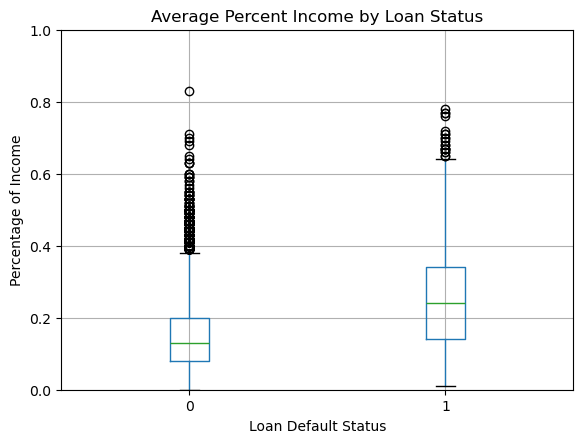

In [50]:
df.boxplot(column ='loan_percent_income', by='loan_status')
plt.xlabel('Loan Default Status')
plt.ylabel('Percentage of Income')
plt.ylim(0.0,1.0) # range was defaulting to -0.1 to 0.9
plt.title('Average Percent Income by Loan Status')
plt.suptitle('') # boxplot automatically adds supertitle for some reason so we can cover it
plt.show()

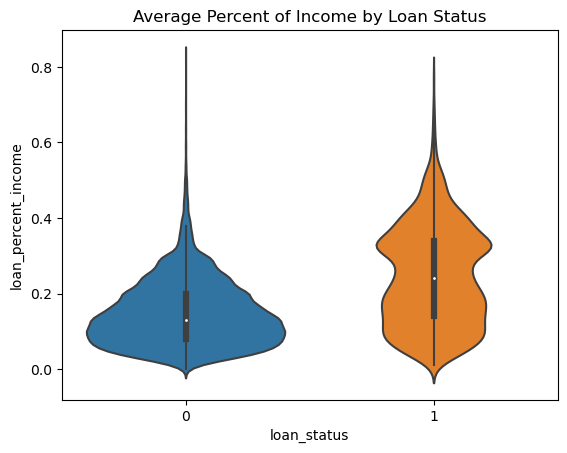

In [51]:
sns.violinplot(data=df,
            x='loan_status',
            y='loan_percent_income')
plt.title('Average Percent of Income by Loan Status')
plt.show()

In [52]:
# From this we can see that the people who defaulted on their loans tended to have loans that were a higher percentage of their income

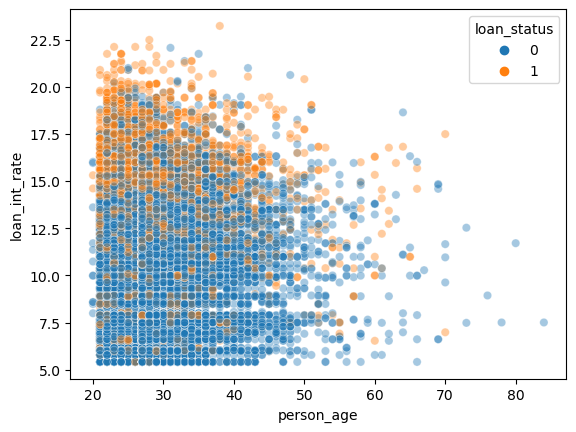

In [53]:
# Scatter plot of age and interest rate
sns.scatterplot(data=df,
                x='person_age',
                y='loan_int_rate',
                hue='loan_status',
                alpha=0.4,
                legend=True)
plt.show()

In [54]:
# exporting our clean dataframe to csv
df.to_csv('credit_risk_dataset_clean.csv', index=False)